# <font color="darkblue"> Prática 02: Algoritmo k-NN </font>

**Objetivos:**


*   Aplicar o algoritmo k-NN a um problema prático.
*   Apresentar as funções do Scikit-Learn que lidam com o k-NN.



**Descrição:**

Implemente duas versões de um classificador que usa o algoritmo k-NN para identificar dígitos escritos à mão a partir de um conjunto de imagens e compare os tempoa de execução. Na primeira versão, você deverá implementar o algoritmo k-NN conforme visto em sala de aula. Na segunda, você deverá usar a algoritmo k-NN da biblioteca Scikit-Learn. O conjunto de imagens a ser utilizado consiste no dataset <i> Digits </i> da biblioteca Scikit-Learn.

# <font color="darkblue"> Solução </font>

### Descrição do Dataset

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Exploração do Dataset

In [2]:
print(digits.target[0:])
print(digits.target[12]) # labels dos dados
print(digits.data.shape) # 1797 imagens e 64 pixels por imagem
print(type(digits.data)) # cada imagem é um np.array
print(digits.images[10]) # exibe os pixels contidos em uma imagem
print(len(digits.target))

[0 1 2 ... 8 9 8]
2
(1797, 64)
<class 'numpy.ndarray'>
[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]
1797


### Exibição das imagens

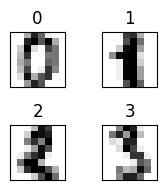

In [3]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(2, 2))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

# usado para um numero nao ficar em cima do outro
plt.tight_layout()

### Implementação da Versão 1 do classificador
Divida os dados em dois conjuntos, de treino e teste, implemente o Algoritmo k-NN conforme discutido em sala de aula e exiba a acurácia da classificação e o tempo de execução.

In [51]:
import numpy as np
import math
from collections import Counter

In [52]:
test_size = math.ceil(1797 * 0.2)
test_data = digits.data[:test_size]
test_label = digits.target[:test_size]
train_data = digits.data[test_size:]
train_label = digits.target[test_size:]


def euclidean_distance(x1, x2):
  distance = np.sqrt(np.sum((x1 - x2)**2))
  return distance

class knn:
  def __init__(self, k=3):
    self.k = k


  # transforma a matriz em um vetor pra poder plotar cada pixel como sendo um ponto
  def flat_vector(self, X):
    flat = X.reshape(-1)

    return flat

  def fit(self, listaImagensTreino, listaRotulosTreino):
    self.listaPontosTreino = [self.flat_vector(p) for p in listaImagensTreino] # lista com todos os vetores das imagens de treino
    self.conjLabelsTreino = self.flat_vector(listaRotulosTreino) # rotulos dos dados
    # print(self.listaPontosTreino)
    # print(self.conjLabelsTreino)

  def predict(self, listaPontosTeste): # para uma lista de X pontos a serem classificados
    predictions = [self._predict(x) for x in listaPontosTeste]
    return predictions

  def _predict(self, x): # para um único ponto x a ser classificado
    distances = [euclidean_distance(x, x_train) for x_train in self.listaPontosTreino]

    indexes_sorted = np.argsort(distances)[:self.k] # retorna os k índices de distances(do indice da menor distance pra maior)
    k_nearest_labels = [self.conjLabelsTreino[i] for i in indexes_sorted] # labels dos índices mais prox

    # votos para escolher a classif
    new_label = Counter(k_nearest_labels).most_common()[0][0]

    '''
    print( new_label = Counter(k_nearest_labels).most_common()) # (label, quantas vezes o label ocorreu)

    [[(3, 1), (1, 1), (2, 1)], [(3, 1), (1, 1), (2, 1)], [(3, 1), (2, 1), (1, 1)], [(2, 1), (3, 1), (1, 1)], [(3, 1), (2, 1), (1, 1)], [(3, 1), (1, 1), (2, 1)]]

    '''
    return new_label




In [53]:
classif = knn(k=3)
classif.fit(train_data, train_label)
predictions = classif.predict(test_data)

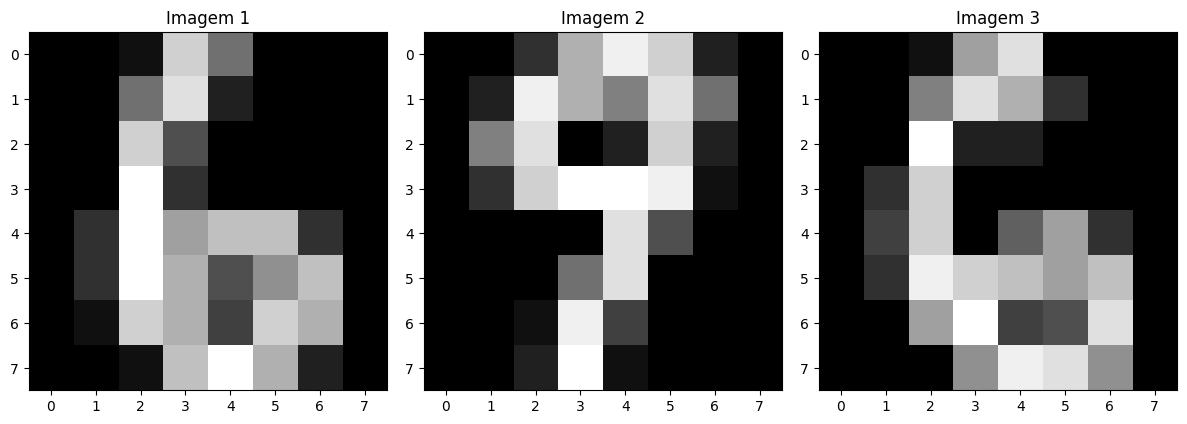

In [57]:
import matplotlib.pyplot as plt
import numpy as np

num_imagens = 3

fig, axes = plt.subplots(1, num_imagens, figsize=(12, 4))

for i in range(num_imagens):
    imagem = classif.listaPontosTreino[i].reshape(8, 8)

    axes[i].imshow(imagem, cmap='gray')
    axes[i].set_title(f'Imagem {i+1}')

plt.tight_layout()
plt.show()

In [54]:
acc_sum = 0

for p,l in zip(predictions, test_label):
  if p == l:
    acc_sum += 1

print("Accuracy: ", (acc_sum/len(predictions)) * 100, "%")

Accuracy:  95.55555555555556 %


### Implementação da Versão 2 do classificador
Utilize a função train_test_split() da bibioteca Scikit-Learn para separar os dados em treino e teste e o classificador k-NN da própria biblioteca para identificação dos dígitos. Ao final, exiba a classificação e o tempo de execução.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits # If you're using the digits dataset
from sklearn.metrics import accuracy_score


digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)  # Set the number of neighbors (k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9833333333333333


### Análise dos resultados

**Teste manual**

Conjunto de Treino: 80%

Conjunto de Teste: 20%

Tempo de Execução: 4s

Acurácia: 95.5%

**Teste scikitlearn**

Conjunto de Treino: 80%

Conjunto de Teste: 20%

Tempo de Execução: menos de 1s

Acurácia:  98.3%